Found 2185 files belonging to 4 classes.


Model: "V21_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 28, 28, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (None, 14, 14, 512)    │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool5 (MaxPooling2D)            │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,719,822 (18.00 MB)

 Trainable params: 1,572,612 (6.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 3,145,226 (12.00 MB)

69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - accuracy: 0.9809 - loss: 0.0644

Test Seti Doğruluğu: 0.9817
Test Seti Kaybı: 0.0673
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step


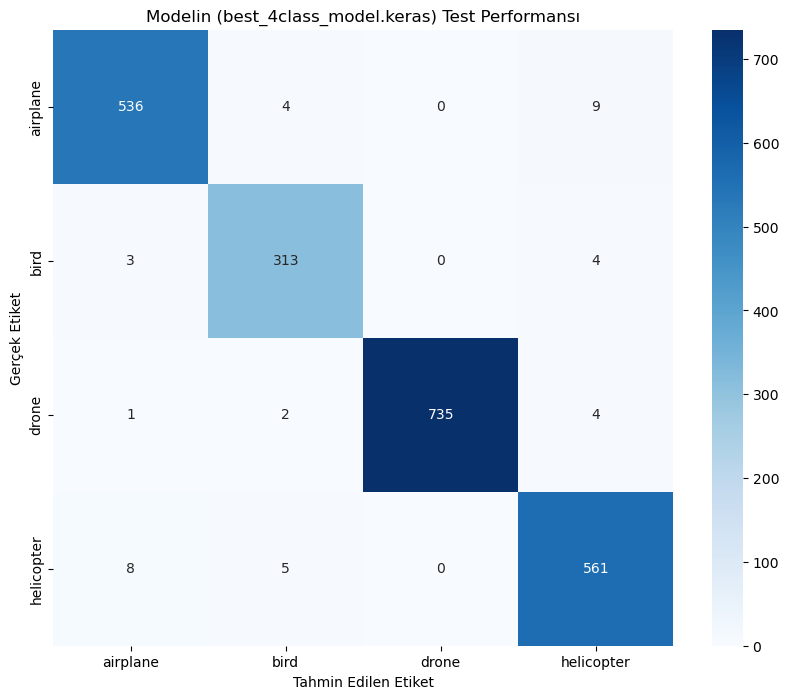

In [1]:
# Gerekli kütüphaneleri dahil etme
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

BASE_PATH = "C:/Users/mkasl/Desktop/donem5/yap470/Ara_rapor_ 1/dataset4" #Büyük dataset yani 4 classı da içeriyor
TEST_PATH = os.path.join(BASE_PATH, 'test')
IMAGE_SIZE = (224, 224) #Aynı şekilde yüksek çözünürlük
BATCH_SIZE = 32
MODEL_PATH = 'best_4class_model.keras' #V21 deneyinde kaydettiğim modelin adı 

test_dataset = tf.keras.utils.image_dataset_from_directory( #random olarak almamı sağlıyor fakat eğitimden farkı shuffle false olarak alıyorum iyi testler için 
    TEST_PATH, labels='inferred', label_mode='categorical',
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, shuffle=False) 

class_names = test_dataset.class_names #Sınıf isimlerini karmaşıklık matrisinde kullanmak için alıyorum
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE) #optimizasyon için cache ve prefecth eğitim setimde de var

#Modelimi yükleme kısmı
if not os.path.exists(MODEL_PATH):
    print(f"Model bulunamadı. -> '{MODEL_PATH}'")
    exit()

model = tf.keras.models.load_model(MODEL_PATH)
model.summary()

#Modelin test seti üzerinde değerlendirilmesi
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest Seti Doğruluğu: {test_accuracy:.4f}")
print(f"Test Seti Kaybı: {test_loss:.4f}")

y_pred_probs = model.predict(test_dataset) #Tahminler
y_pred = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.concatenate([y for x, y in test_dataset], axis=0) #Gerçek etiketler
y_true = np.argmax(y_true_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
#Karmaşıklık Matrisi 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Modelin ({os.path.basename(MODEL_PATH)}) Test Performansı')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()
